<a href="https://colab.research.google.com/github/dhanushgc/pandas-python-learning/blob/master/PCA%20Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Principal Component Analysis Implementation**

In [0]:
import pandas as pd 
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import files
uploads = files.upload()

Saving Iris.csv to Iris.csv


### **1. Loading Iris Flower Dataset**

In [0]:
iris_data = pd.read_csv(io.BytesIO(uploads['Iris.csv']))

In [0]:
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [0]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


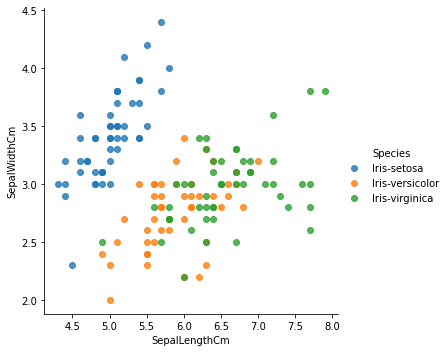

In [0]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=iris_data, fit_reg=False, hue='Species')


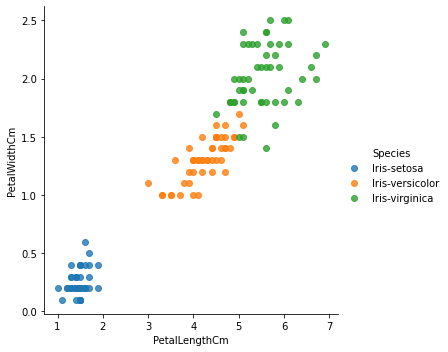

In [0]:
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=iris_data, fit_reg=False, hue='Species')

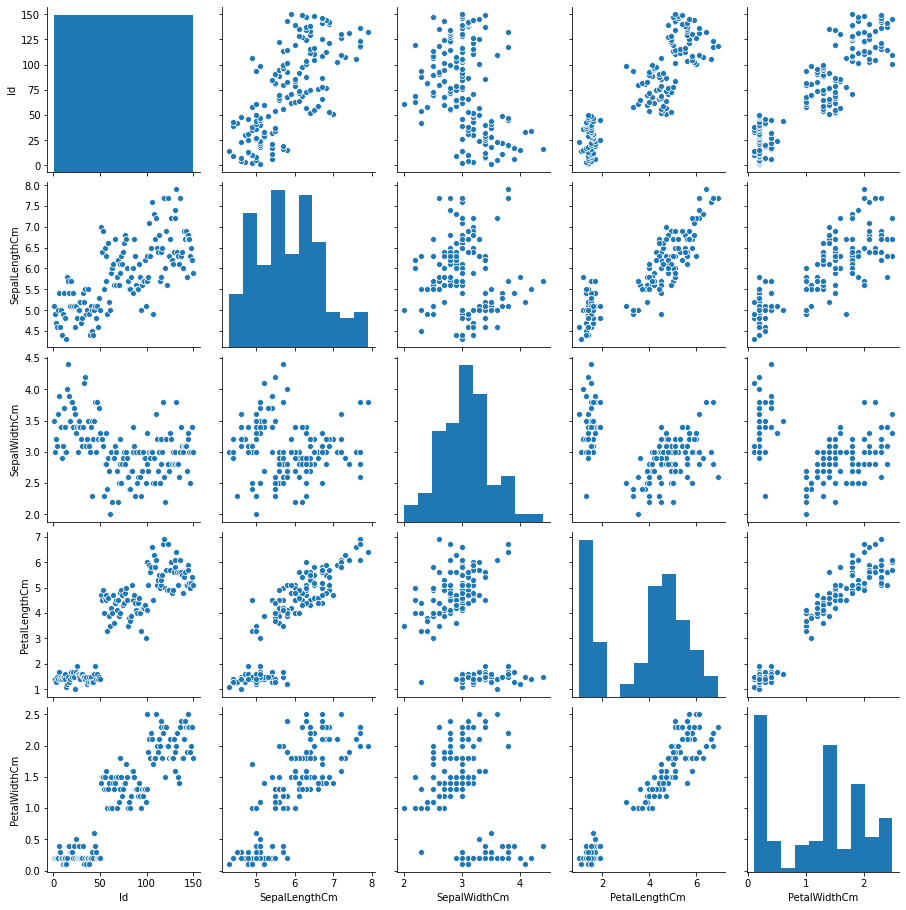

In [0]:
sns.pairplot(iris_data)

[]

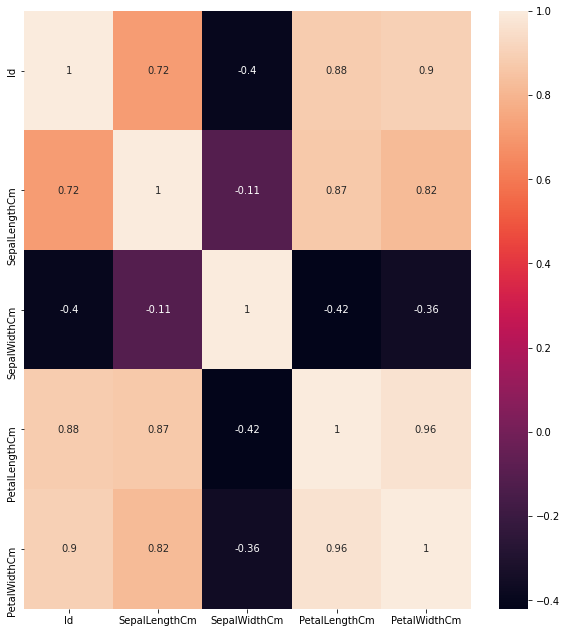

In [0]:
plt.figure(figsize=(10,11))
sns.heatmap(iris_data.corr(),annot=True)
plt.plot()

#We can see that Sepal Length and Sepal Width features are slightly correlated with each other.


### **2. Calculate the mean of each feature and Subtract the mean from each tuple**

In [0]:
c1 = iris_data['SepalLengthCm'].mean()
c2 = iris_data['SepalWidthCm'].mean()
c3 = iris_data['PetalLengthCm'].mean()
c4 = iris_data['PetalWidthCm'].mean()

In [0]:
print(c1, c2, c3, c4)

5.843333333333335 3.0540000000000007 3.7586666666666693 1.1986666666666672


In [0]:
list1 = np.array(iris_data)

In [0]:
list1.shape

(150, 6)

In [0]:
for i in range(0,150):
  list1[i][1] = list1[i][1]-c1
  list1[i][2] = list1[i][2]-c2
  list1[i][3] = list1[i][3]-c3
  list1[i][4] = list1[i][4]-c4

In [0]:
preprocessed_data = pd.DataFrame(list1)

In [0]:
preprocessed_data.head()

,0,1,2,3,4,5
0,1,-14.598,0.446,-2.35867,-0.998667,Iris-setosa
1,2,-14.798,-0.054,-2.35867,-0.998667,Iris-setosa
2,3,-14.998,0.146,-2.45867,-0.998667,Iris-setosa
3,4,-15.098,0.046,-2.25867,-0.998667,Iris-setosa
4,5,-14.698,0.546,-2.35867,-0.998667,Iris-setosa


### **3. Finding Covariance Matrix**

In [0]:
preprocessed_data.columns = ['Id', 'SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm',	'Species']

In [0]:
preprocessed_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-14.598,0.446,-2.35867,-0.998667,Iris-setosa
1,2,-14.798,-0.054,-2.35867,-0.998667,Iris-setosa
2,3,-14.998,0.146,-2.45867,-0.998667,Iris-setosa
3,4,-15.098,0.046,-2.25867,-0.998667,Iris-setosa
4,5,-14.698,0.546,-2.35867,-0.998667,Iris-setosa


In [0]:
#Spliting Features And Label
X = preprocessed_data[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm',]]
y = preprocessed_data[['Species']]

In [0]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-14.598,0.446,-2.35867,-0.998667
1,-14.798,-0.054,-2.35867,-0.998667
2,-14.998,0.146,-2.45867,-0.998667
3,-15.098,0.046,-2.25867,-0.998667
4,-14.698,0.546,-2.35867,-0.998667


In [0]:
y.head()

In [0]:
#Finding cov matrix
X = X.convert_dtypes()

features = X.T
cov_matrix = np.cov(features)
print(cov_matrix)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


### **4. Calculate Eigenvalues and Eigenvectors of the covariance matrix**

In [0]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [0]:
#Eigenvalues
eig_values

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [0]:
#Eigenvectors
eig_vectors

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

### **5. Feature Selection**

Once Eigenvectors are formed, order them by Eigenvalues from highest to lowest.
The Eigenvector with the highest Eigenvalue is the most significant feature. This
forms the Principal Component. The Eigenvectors with the lowest Eigenvalue can
be ignored italicized text

In [0]:
eig_pair = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pair.sort(key=lambda x: x[0], reverse=True)

In [0]:
for i in eig_pair:
    print(i[0])

4.224840768320107
0.24224357162751453
0.07852390809415456
0.023683027126000473


In [0]:
total = sum(eig_values)
var_exp = [(i / total) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

[92.46162071742687, 5.301556785053494, 1.718513952500682, 0.5183085450189621]


Since Only Vector V1 And Vector V2 Is Having High Significance, The Other Two Vectors Can Be Dropped

### **6. Derive The New Dataset**

In [0]:
pca_iris = iris_data
pca_iris = pca_iris.drop(['PetalLengthCm'], axis=1)
pca_iris = pca_iris.drop(['PetalWidthCm'], axis=1)
pca_iris

,Id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,5.0,3.6,Iris-setosa
...,...,...,...,...
145,146,6.7,3.0,Iris-virginica
146,147,6.3,2.5,Iris-virginica
147,148,6.5,3.0,Iris-virginica
148,149,6.2,3.4,Iris-virginica
